# 90 Minutes To Machine Learning

## Why are we here?
1. Intro to the Codeup experience
2. Big Picture overview of Data Science
3. Intro to Machine Learning covering:
    - Data visualization
    - Python ML libraries
    - Building a predictive model
    - Evaluating how well a predictive model performs

## Why Codeup?
- Focus on student outcomes
- Placement services and quality of network
- Immersion works. Full-time, live instruction for 5 months works.
- Projects simulate the work environment from real world data to presenting findings to stakeholders

## What is Data Science?
- Interdisciplinary applied science intersecting programming, statistics, and domain expertise
- The application of the scientific method of hypothesis -> experiment -> analyze -> repeat to analyze and infer outcomes from data.
- A broad description of approaches ranging from business analysis and visualizations to machine learning and deep neural network analysis.
![](drawn_ds_venn_diagram.png)

## What is Machine Learning?
- Machine Learning is the process of using previous data as the fuel for determining rules for making predictions of outcomes from future data.
-  Classical programming takes business rules and data to produce answers. Ex. TurboTax software.
- Machine learning takes in data (and sometimes answers/labels for some data) and produces rules or predictions for future data. The example here is text message autocomplete.

<img src="classical_programming_vs_machine_learning.jpeg" width=500>


## Where does Machine Learning Fit Into Data Science?

![](example_data_science_project.png)

##### The Data Science Pipeline:
- Planning
- Data Acquisition
- Data Cleaning
- Exploratory Data Analysis (visualization, hypothesis testing)
- Modeling
- Presenting Findings

## Types of Machine Learning and Other Skills Covered in Codeup
![](machine_learning_methods.png)

## Challenges of Machine Learning
- Garbage in, garbage out
- Insufficient quantity of data
- Nonrepresentative data
- Poor quality data
- Overfitting or underfitting
- Bias in, bias out


In [4]:
# Data Processing and Data Cleaning Libraries
import pandas as pd
import numpy as np

# Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing
from sklearn.model_selection import train_test_split

# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.metrics import classification_report

In [5]:
def split(df, stratify_by=None):
    """
    3 way split for train, validate, and test datasets
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(df, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(df, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

In [21]:
df = pd.read_csv("attrition.csv")
df.head(3).T

,0,1,2
Age,41,49,37
Attrition,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373
Department,Sales,Research & Development,Research & Development
DistanceFromHome,1,8,2
Education,2,1,2
EducationField,Life Sciences,Life Sciences,Other
EmployeeCount,1,1,1
EmployeeNumber,1,2,4


### Continuous Valued Features
- Age
- DailyRate
- DistanceFromHome
- HourlyRate
- MonthlyIncome (is this a multiple of their rate * hours or something else?)
- MonthlyRate
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

## Categorical Features
- Attrition (yes or no)
- Gender (this data has a binary)
- BusinessTravel (none, rarely, frequently)
- Department (R&D, Sales, HR)
- Education (1-5)
- EducationField (6 categories)
- EnvironmentSatisfaction (1-4)
- JobInvolvement (1-4)
- JobLevel (1 through 5)
- JobRole (9 different job role names)
- Job Satisfaction (1 - 4)
- MaritalStatus (single, married, divorced)
- NumCompaniesWorked
- OverTime (yes or no)
- PerformanceRating (3 or 4)
- RelationshipSatisfaction (1 through 4)
- StockOptionLevel (0 through 3)
- TrainingTimesLastYear(0 through 6)
- WorkLifeBalance (1 - 4)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

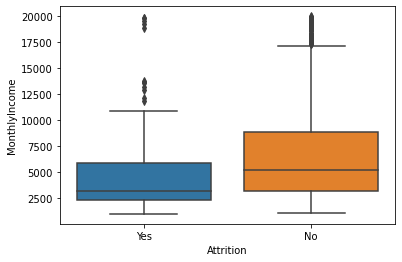

In [18]:
sns.boxplot(x=df.Attrition, y=df.MonthlyIncome, data=df)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

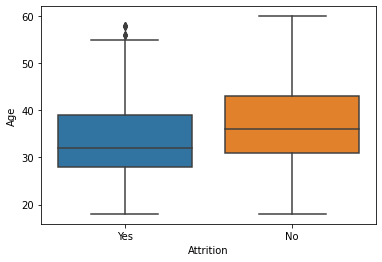

In [19]:
sns.boxplot(x=df.Attrition, y=df.Age, data=df)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

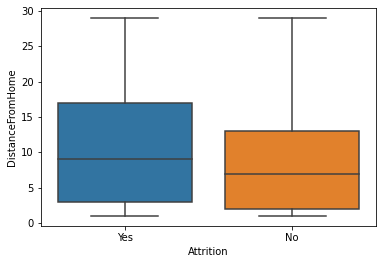

In [20]:
sns.boxplot(x=df.Attrition, y=df.DistanceFromHome, data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

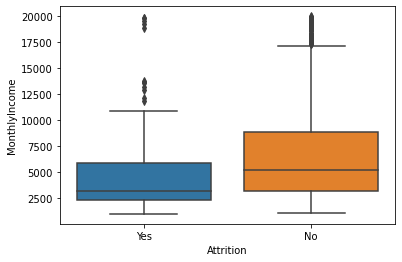

In [24]:
sns.boxplot(x=df.Attrition, y=df.MonthlyIncome, data=df)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyRate'>

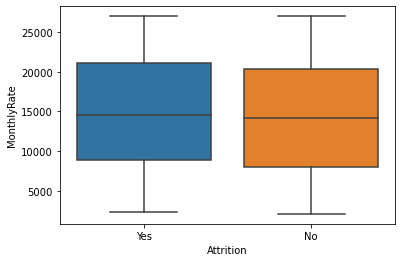

In [26]:
sns.boxplot(x=df.Attrition, y=df.MonthlyRate, data=df)

## Homework